# Using 1Inch to Estimate Slippage

We can start caching the output of the 1Inch `quote` API and use that for our slippage calculation.

In [1]:
from src.network.oneinchquotes import OneInchQuotes
from src.configs import config

from dotenv import load_dotenv
import os

from src.utils.plotting import plot_price_impact_1inch, plot_price_1inch

%load_ext autoreload
%autoreload 2

load_dotenv()
INCH_API_KEY = os.getenv("1INCH_API_KEY")

In [21]:
protocols

[{'id': 'UNISWAP_V1',
  'title': 'Uniswap V1',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap_color.png'},
 {'id': 'UNISWAP_V2',
  'title': 'Uniswap V2',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap_color.png'},
 {'id': 'SUSHI',
  'title': 'SushiSwap',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/sushiswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/sushiswap_color.png'},
 {'id': 'MOONISWAP',
  'title': 'Mooniswap',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/mooniswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/mooniswap_color.png'},
 {'id': 'BALANCER',
  'title': 'Balancer',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/balancer.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/balancer_color.png'},
 {'id': 'COMPOUND',
  

In [2]:
oneinchquotes = OneInchQuotes(INCH_API_KEY, config.ALL, calls=20)
protocols = oneinchquotes.protocols()["protocols"]
protocols[:5]

[{'id': 'UNISWAP_V1',
  'title': 'Uniswap V1',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap_color.png'},
 {'id': 'UNISWAP_V2',
  'title': 'Uniswap V2',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/uniswap_color.png'},
 {'id': 'SUSHI',
  'title': 'SushiSwap',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/sushiswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/sushiswap_color.png'},
 {'id': 'MOONISWAP',
  'title': 'Mooniswap',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/mooniswap.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/mooniswap_color.png'},
 {'id': 'BALANCER',
  'title': 'Balancer',
  'img': 'https://cdn.1inch.io/liquidity-sources-logo/balancer.png',
  'img_color': 'https://cdn.1inch.io/liquidity-sources-logo/balancer_color.png'}]

In [3]:
# Construct a curve of quotes to estimate price impact = f(trade size)
in_token, out_token = "USDC", "WETH"
res = oneinchquotes.quotes_for_pair((in_token, out_token))
res

[QuoteResponse(src='USDC', dst='WETH', in_amount=1000000000, out_amount=503861351727115978, gas=202393, timestamp=1700009310, in_decimals=6, out_decimals=18, price=0.0005038613517271159, protocols=[[[{'name': 'UNISWAP_V3', 'part': 100, 'fromTokenAddress': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'toTokenAddress': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'}]]]),
 QuoteResponse(src='USDC', dst='WETH', in_amount=1832980710, out_amount=923530712550927848, gas=202393, timestamp=1700009312, in_decimals=6, out_decimals=18, price=0.0005038409337929845, protocols=[[[{'name': 'UNISWAP_V3', 'part': 100, 'fromTokenAddress': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'toTokenAddress': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'}]]]),
 QuoteResponse(src='USDC', dst='WETH', in_amount=3359818286, out_amount=1692688179878788347, gas=202393, timestamp=1700009313, in_decimals=6, out_decimals=18, price=0.0005038034904840053, protocols=[[[{'name': 'UNISWAP_V3', 'part': 100, 'fromTokenAddress': '

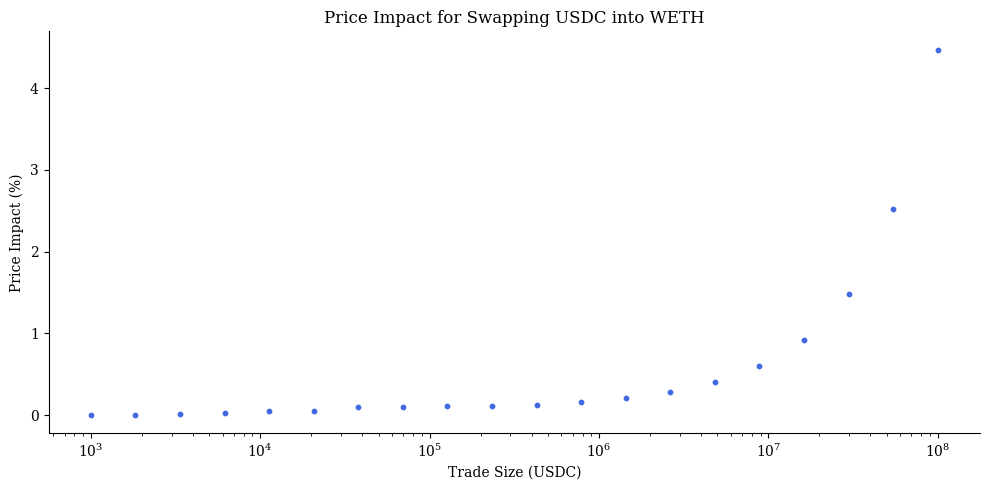

In [11]:
_ = plot_price_impact_1inch(res, in_token, out_token)

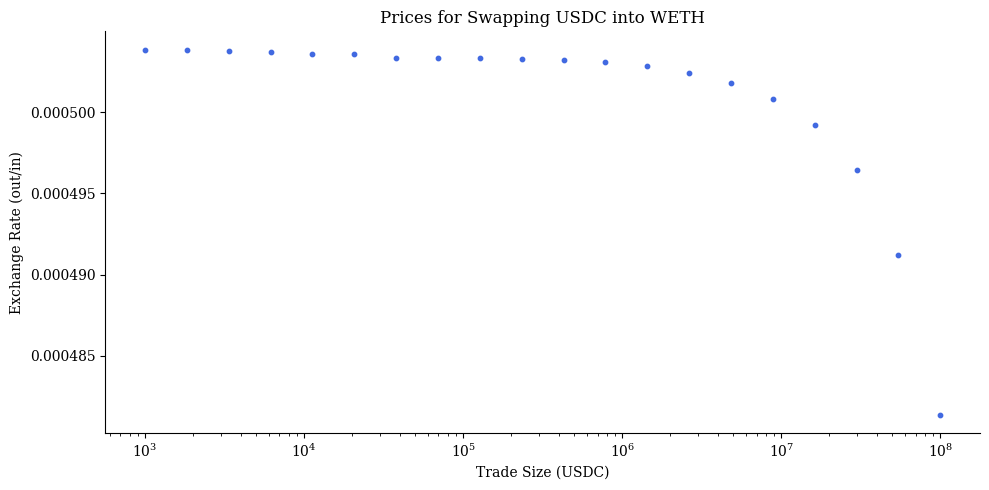

In [12]:
_ = plot_price_1inch(res, in_token, out_token)

In [16]:
payload = oneinchquotes.all_quotes(list(config.ALL.keys()))

Fetching: ('USDC', 'USDT')...
Fetching: ('USDC', 'USDP')...
Fetching: ('USDC', 'TUSD')...
Fetching: ('USDC', 'WETH')...
Fetching: ('USDC', 'wstETH')...
Fetching: ('USDC', 'sfrxETH')...
Fetching: ('USDC', 'WBTC')...
Fetching: ('USDC', 'tBTC')...
Fetching: ('USDT', 'USDC')...
Fetching: ('USDT', 'USDP')...
Fetching: ('USDT', 'TUSD')...
Fetching: ('USDT', 'WETH')...
Fetching: ('USDT', 'wstETH')...
Fetching: ('USDT', 'sfrxETH')...
Fetching: ('USDT', 'WBTC')...
Fetching: ('USDT', 'tBTC')...
Fetching: ('USDP', 'USDC')...
Fetching: ('USDP', 'USDT')...
Fetching: ('USDP', 'TUSD')...
Fetching: ('USDP', 'WETH')...
Fetching: ('USDP', 'wstETH')...
Fetching: ('USDP', 'sfrxETH')...
Fetching: ('USDP', 'WBTC')...
Fetching: ('USDP', 'tBTC')...
Fetching: ('TUSD', 'USDC')...
Fetching: ('TUSD', 'USDT')...
Fetching: ('TUSD', 'USDP')...
Fetching: ('TUSD', 'WETH')...
Fetching: ('TUSD', 'wstETH')...
Fetching: ('TUSD', 'sfrxETH')...
Fetching: ('TUSD', 'WBTC')...
Fetching: ('TUSD', 'tBTC')...
Fetching: ('WETH', '

In [20]:
df = oneinchquotes.dump(payload, fn="../data/1inch/tmp.csv")
df.head()

,src,dst,in_amount,out_amount,gas,price,protocols,timestamp
0,USDC,USDT,1000000000,999897284,230576,0.999897,"[[[{""name"": ""NOMISWAP_STABLE"", ""part"": 100, ""f...",1700009683
0,USDC,USDT,1832980710,1832791129,230576,0.999897,"[[[{""name"": ""NOMISWAP_STABLE"", ""part"": 100, ""f...",1700009684
0,USDC,USDT,3359818286,3359466297,230576,0.999895,"[[[{""name"": ""NOMISWAP_STABLE"", ""part"": 100, ""f...",1700009685
0,USDC,USDT,6158482110,6157821131,230576,0.999893,"[[[{""name"": ""NOMISWAP_STABLE"", ""part"": 100, ""f...",1700009687
0,USDC,USDT,11288378916,11287109259,230576,0.999888,"[[[{""name"": ""NOMISWAP_STABLE"", ""part"": 100, ""f...",1700009688
